# Auto Regression Model of Chennai Temperature Forecasting


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
date = ['1-1-2023','1-2-2023','1-3-2023','1-4-2023','1-5-2023','1-6-2023','1-7-2023','1-8-2023','1-9-2023','1-10-2023','1-11-2023','1-12-2023']
date = pd.to_datetime(date,format = "%d-%m-%Y")
date

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq=None)

In [47]:
avg_temp = [25.5,27,29,31,33,32,31,30,29.5,28,26.5,25]
temp_data = pd.DataFrame({'Date':date,'Temp_C' : avg_temp})
temp_data

,Date,Temp_C
0,2023-01-01,25.5
1,2023-02-01,27.0
2,2023-03-01,29.0
3,2023-04-01,31.0
4,2023-05-01,33.0
5,2023-06-01,32.0
6,2023-07-01,31.0
7,2023-08-01,30.0
8,2023-09-01,29.5
9,2023-10-01,28.0


In [50]:
temp_data1 = temp_data.set_index('Date')
temp_data1

,Temp_C
Date,
2023-01-01,25.5
2023-02-01,27.0
2023-03-01,29.0
2023-04-01,31.0
2023-05-01,33.0
2023-06-01,32.0
2023-07-01,31.0
2023-08-01,30.0
2023-09-01,29.5


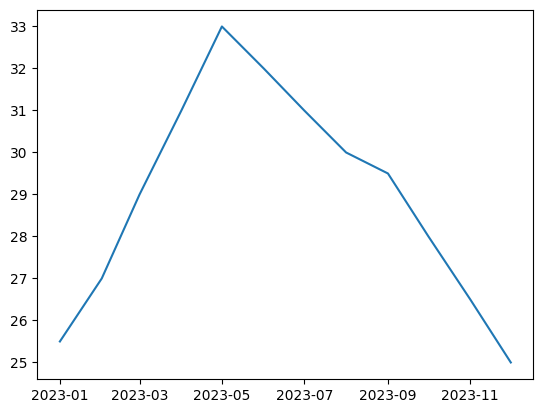

In [48]:
plt.plot(temp_data['Date'],temp_data['Temp_C'])

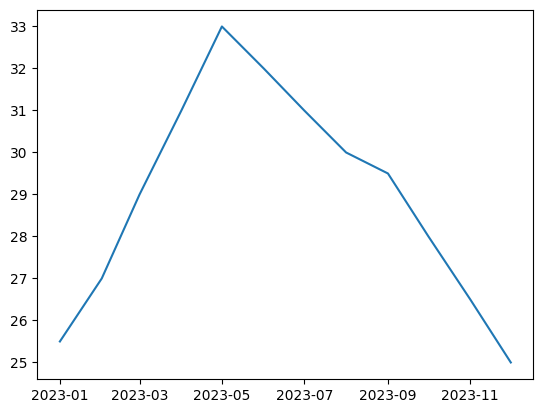

In [6]:
plt.plot(temp_data1)

In [51]:
from statsmodels.tsa.ar_model import AutoReg

In [58]:
ARmodel = AutoReg(temp_data1,lags = 1)
AR = ARmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
y_pred = AR.predict(0,11)
y_pred

2023-01-01          NaN
2023-02-01    26.134831
2023-03-01    27.367576
2023-04-01    29.011236
2023-05-01    30.654896
2023-06-01    32.298555
2023-07-01    31.476726
2023-08-01    30.654896
2023-09-01    29.833066
2023-10-01    29.422151
2023-11-01    28.189406
2023-12-01    26.956661
Freq: MS, dtype: float64

In [30]:
pred_data = temp_data1.copy()

In [31]:
pred_data['Temp_pred'] = y_pred
pred_data

,Temp_C,Temp_pred
Date,,
2023-01-01,25.5,NaN
2023-02-01,27.0,26.134831
2023-03-01,29.0,27.367576
2023-04-01,31.0,29.011236
2023-05-01,33.0,30.654896
2023-06-01,32.0,32.298555
2023-07-01,31.0,31.476726
2023-08-01,30.0,30.654896
2023-09-01,29.5,29.833066


<Axes: xlabel='Date'>

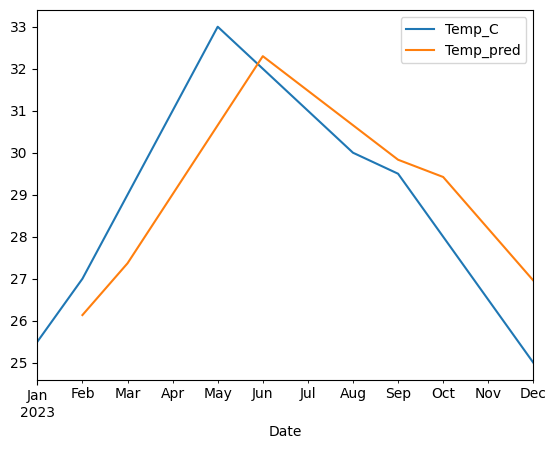

In [32]:
pred_data.plot()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
pred_data

,Temp_C,Temp_pred
Date,,
2023-01-01,25.5,NaN
2023-02-01,27.0,26.134831
2023-03-01,29.0,27.367576
2023-04-01,31.0,29.011236
2023-05-01,33.0,30.654896
2023-06-01,32.0,32.298555
2023-07-01,31.0,31.476726
2023-08-01,30.0,30.654896
2023-09-01,29.5,29.833066


In [35]:
pred_data.dropna(inplace = True)
mae  = mean_absolute_error(pred_data['Temp_C'],pred_data['Temp_pred'])
mae

1.242083758937696

In [36]:
mean_squared_error(pred_data['Temp_C'],pred_data['Temp_pred'])

2.039033999708158

In [37]:
y_pred2024 = AR.predict(12,17)
y_pred2024 = y_pred2024.to_frame()
y_pred2024.columns = ['y_pred2024']
y_pred2024

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,y_pred2024
2024-01-01,25.723917
2024-02-01,26.318853
2024-03-01,26.807789
2024-04-01,27.209612
2024-05-01,27.539841
2024-06-01,27.811234


In [40]:
pred_data24 = pd.concat([pred_data, y_pred2024],axis = 1)
pred_data24

,Temp_C,Temp_pred,y_pred2024
2023-02-01,27.0,26.134831,NaN
2023-03-01,29.0,27.367576,NaN
2023-04-01,31.0,29.011236,NaN
2023-05-01,33.0,30.654896,NaN
2023-06-01,32.0,32.298555,NaN
2023-07-01,31.0,31.476726,NaN
2023-08-01,30.0,30.654896,NaN
2023-09-01,29.5,29.833066,NaN
2023-10-01,28.0,29.422151,NaN
2023-11-01,26.5,28.189406,NaN


<Axes: >

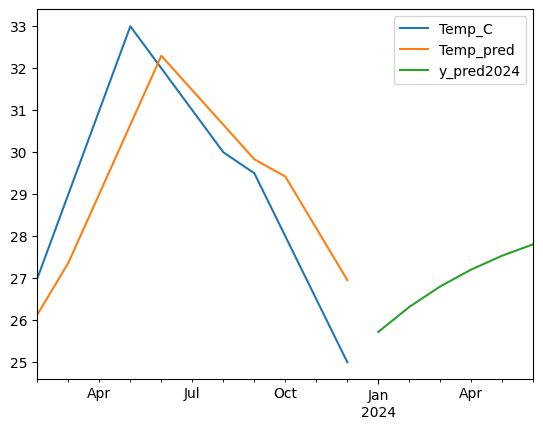

In [42]:
pred_data24.plot()